In [131]:
# Importing Pandas, Numpy and MatplotLib. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for heatmap

In [132]:
# load data
housing = pd.read_csv("housing.csv")

EDA on data in housing file

In [133]:
#check if there are non-null rows
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#about 1% (20640-20433)/20640) or 207 records of the data has missing values for number of bedrooms. 
# Will drop those rows and only work with full data
housing.dropna(how="any", inplace=True) 
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#check data in csv file. We have 20433 rows and 10 columns
#totalRooms is total number of rooms in a block. 
#totalBedrooms is total number of bedrooms in a block and population is total number of people residing within a block

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

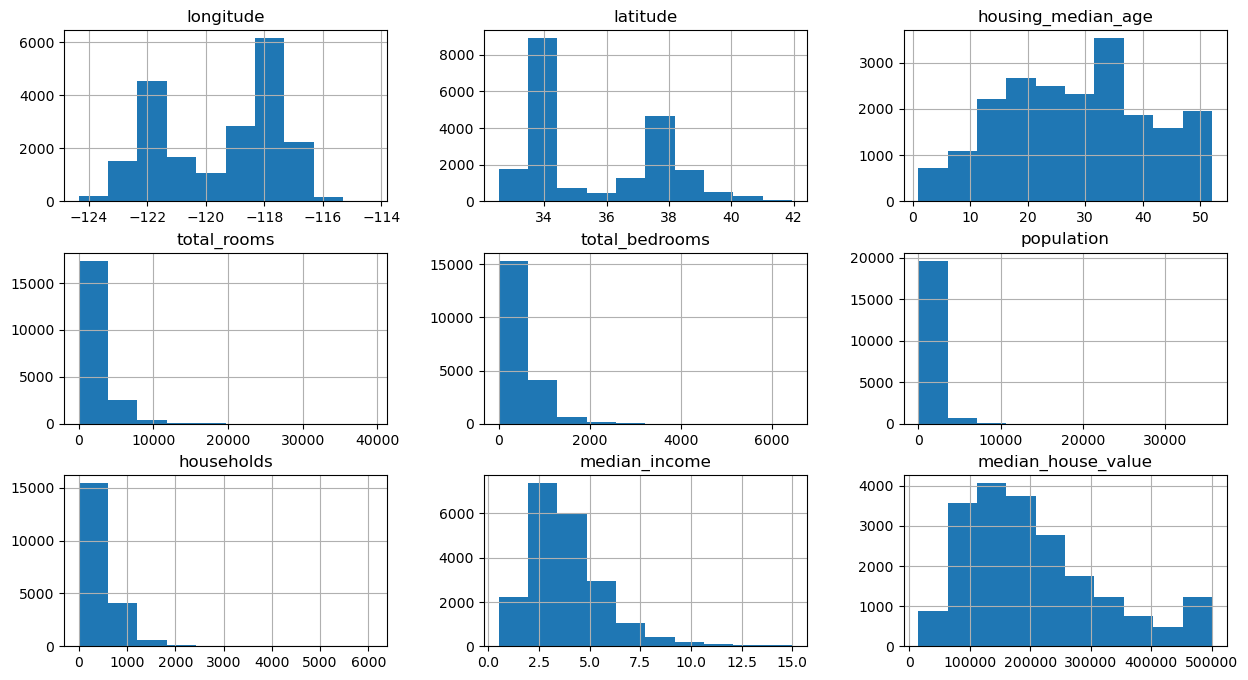

In [136]:
housing.hist(figsize=(15, 8)) #distribution of the different features in histogram

In [ ]:
#as we can see we have some features "to the right". If we check them and compare mean value with the 50% value, 
# we can see that mean is higher then the 50% value, so
# we have some extrem values pulling this to the right. Longitude, latitude and age is more even spred.
housing[["median_house_value", "total_rooms", "total_bedrooms", "population", "households", "median_income"]].describe()

,median_house_value,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,206864.413155,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,115435.667099,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,14999.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,119500.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,179700.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,264700.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,500001.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64


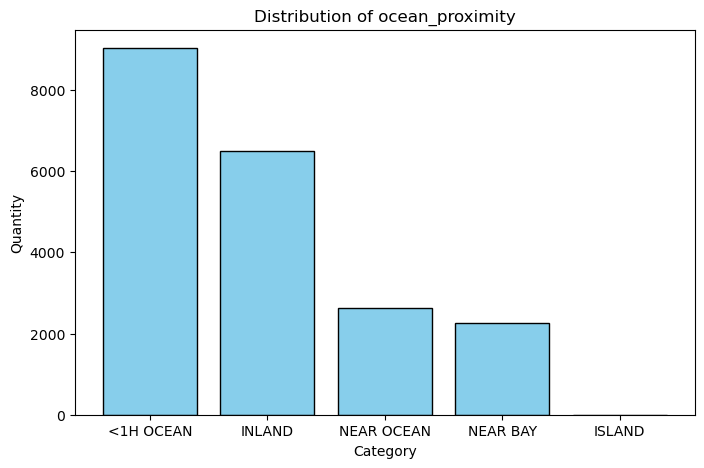

In [ ]:

#look at the distribution of houses by location
print(housing["ocean_proximity"].unique())
print("")
value_counts = housing["ocean_proximity"].value_counts()
print(value_counts)

plt.figure(figsize=(8, 5))
plt.bar(value_counts.index, value_counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Distribution of ocean_proximity")
plt.show()

#Most of the houses are localized near the ocean. ISLAND has very few houses and since there are few data point, those points can be removed in future process.

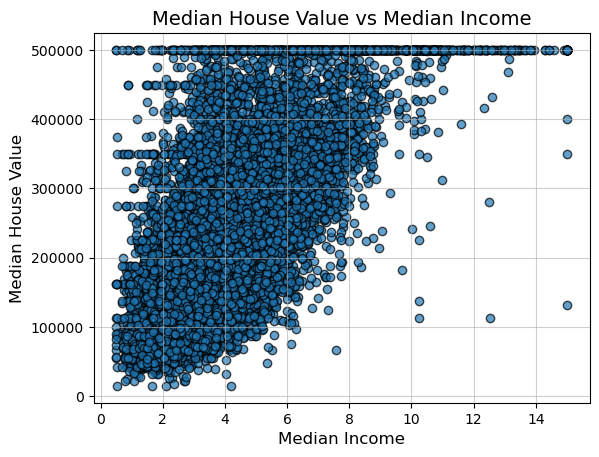

In [139]:
#plot a scatter plott with income on x and house value on y
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.7, edgecolor='k')
plt.title('Median House Value vs Median Income', fontsize=14)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True, alpha=0.6)

#we can see that we have a correlation between income and house price (almost linear). We also see that the highest house value is strange. It can depend on that all higher
#values (over 500000) has been grouped into one group, 500000. There is also strange that high house value has data points in almost every income. 
# One explanation could be that people with lower income has inherited the house. It could also be that the house is old and that the residient
# has lived there for many years and the house value has incresed during that time. 

In [140]:
#check how many houses with max price
#these points can be removed in future handling
no_houses_max_price = housing['median_house_value'].value_counts().get(500001.000000, 0)
print(no_houses_max_price)

958


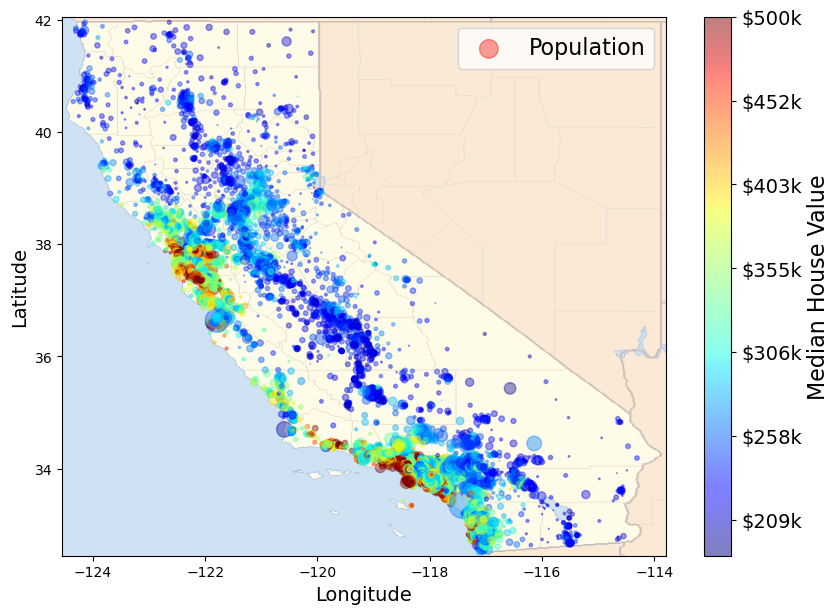

In [141]:
#plot a map to see if house value is depending on location
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

In [142]:
# we can see that highest house values are near the water

In [ ]:
#plot correlations to see what is correlated with house value
housing.corr(numeric_only = True) #method='pearson'
#interested in the housing value and can see that income correlation is 0.69, indication that income is correlation with house value
#this is also shown in the scatterplot so these two plots is confirming that income and house value are related.
# can also see that total rooms, total bedrooms, households and population has a strong correlation with each other. But we are interested in house value.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

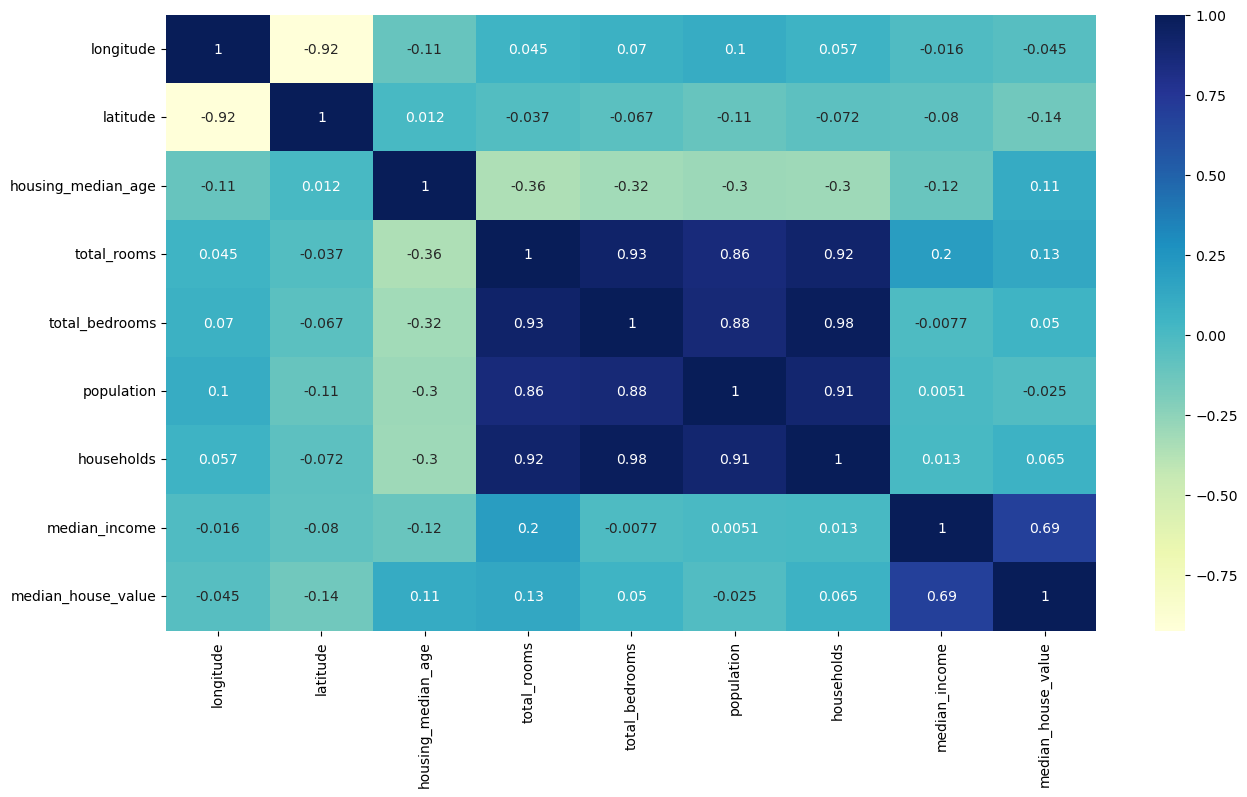

In [ ]:
#plot correlations in a heatmap. This should give the same result as abow but is easier to read.
plt.figure(figsize=(15,8))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap="YlGnBu") #green/blue

<Axes: >

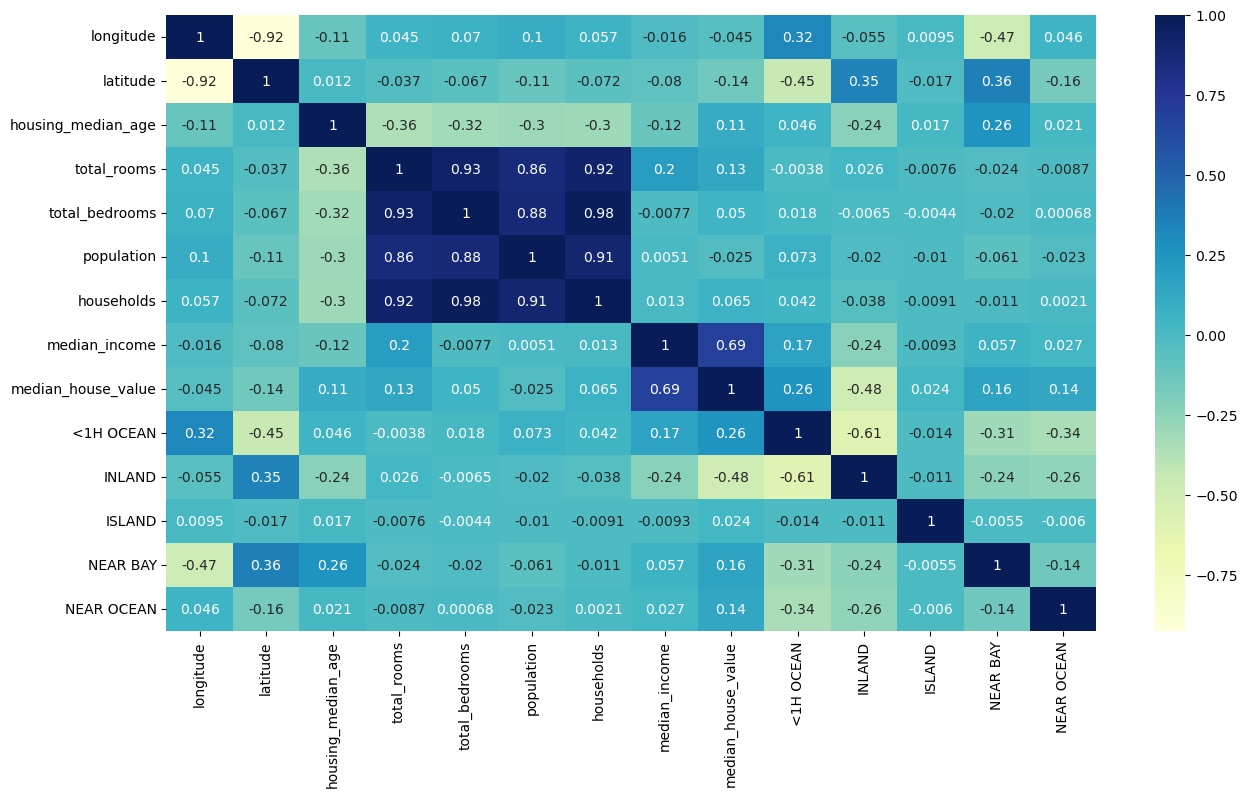

In [145]:
#change ocean_proximity to seperated columns with binary values 0/1. Make a heat map to find what can be value depending
housing1 = housing.join(pd.get_dummies(housing.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(housing1.corr(numeric_only=True), annot=True, cmap="YlGnBu") #green/blue

In [ ]:
#this new heatmap also confirmes earlier conclusion that <1H OCEAN has a higher house value and 
# that INLAND has the lowest correlation to house value.

In [ ]:
#conclusion:
#The data has some null values (207) that has been removed in the data frame.
#Houses located on ISLAND are few (5) and can be removed in future data handling.
#House value in max value are probable grouped with values higher than max value. These 958 records with house value = 500001 can be excluded from the data set. 
#  to minimize unknown data points. 
#There are som extreme values on several features that can be a problem in futher model.

#Several analysis shows that income is related to house value and also that location is effecting the house value.
 #Houses located <1 H Ocean has the highest house value and houses located INLAND has the lowest.